## Count Surfers in the Water
### Description
This project is to count how many surfers in the water
So you know the traffi in the water.

A typical good sample image as follows: (You can see 3 people are in the water)

<img src="./Images/SampleImages_001.png" width="600" align="left" />



### Goal
My goal is to let the software automatically count how many people are in the water given series of images (video), this project is to count how many surfers are in the water

### File Structure

./Images - includes all the images

./Videos - includes all the videos

### Various conditions

Wish there are only good days for beach day. But, unfortunately there are many different weather/environment conditions we need to take care!

Condition | Image
------------ | -------------
Fog |	<img src="./Images/Conditions_Fog.png" width="500" align="left" />
Birds |	<img src="./Images/Conditions_Birds.png" width="500" align="left" />
Dark |	<img src="./Images/Conditions_Dark.png" width="500" align="left" />
Poor Image |	<img src="./Images/Conditions_PoorImageQuality.png" width="500" align="left" />



In [139]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

Below block is just to see how each color filter works
Hopefully something can help be identify the surfers

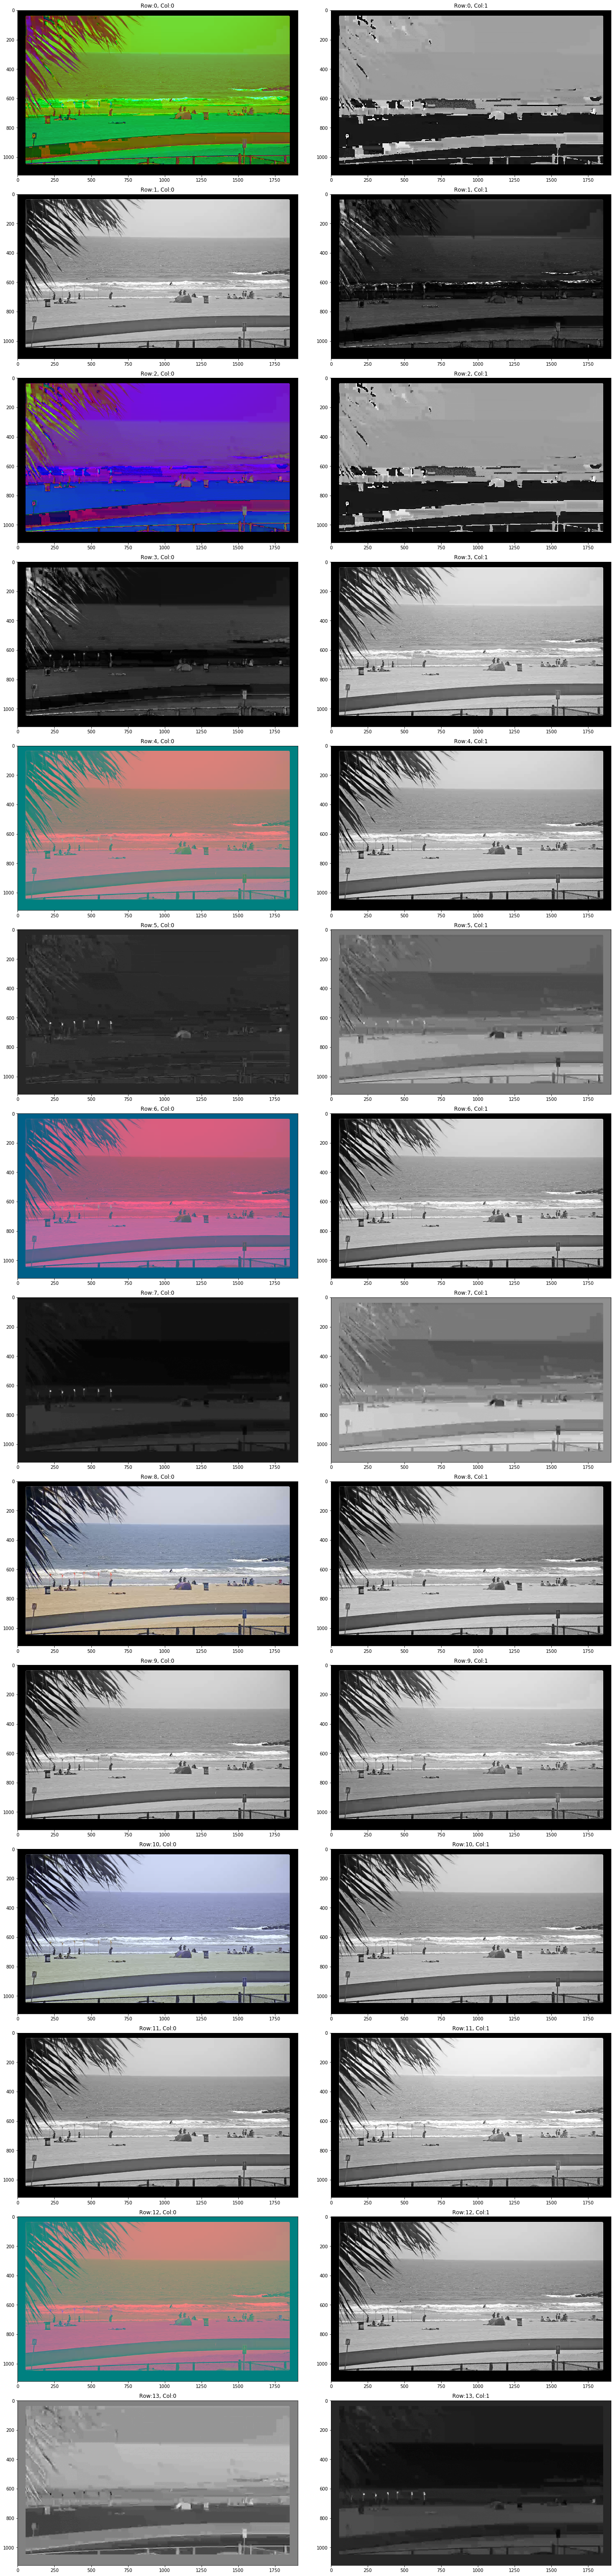

In [175]:
img = cv2.imread('./Images/SampleImages_001.png')
res =[]
def checkColorVariance(img,res,color_code = cv2.COLOR_BGR2HLS):
    temp = []
    temp.append(cv2.cvtColor(img,color_code))
    for i in range(3):
        temp.append(temp[0][:,:,i])
    res += temp
        
checkColorVariance(img,res,cv2.COLOR_BGR2HLS)
checkColorVariance(img,res,cv2.COLOR_BGR2HSV)
checkColorVariance(img,res,cv2.COLOR_BGR2LAB)
checkColorVariance(img,res,cv2.COLOR_BGR2LUV)
checkColorVariance(img,res,cv2.COLOR_BGR2RGB)
checkColorVariance(img,res,cv2.COLOR_BGR2XYZ)
checkColorVariance(img,res,cv2.COLOR_BGR2YUV)

# Display image function captured from below link    
# https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly/46616645

# settings
nrows, ncols = len(res)//2, 2  # array of sub-plots
figsize = [20, 80]     # figure size, inches

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# plot simple raster image on each sub-plot
for i, axi in enumerate(ax.flat):
    # i runs from 0 to (nrows*ncols-1)
    # axi is equivalent with ax[rowid][colid]
    img = res[i]
    axi.imshow(img,cmap='gray')

    # get indices of row/column
    rowid = i // ncols
    colid = i % ncols
    # write row/col indices as axes' title for identification
    axi.set_title("Row:"+str(rowid)+", Col:"+str(colid))

plt.tight_layout(True)
plt.show()